Bank Defaults

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients over a six-month period. 

Data
ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005
PAY_2: Repayment status in August, 2005
PAY_3: Repayment status in July, 2005 
PAY_4: Repayment status in June, 2005 
PAY_5: Repayment status in May, 2005 
PAY_6: Repayment status in April, 2005 
BILL_AMT1: Amount of bill statement in September, 2005
BILL_AMT2: Amount of bill statement in August, 2005
BILL_AMT3: Amount of bill statement in July, 2005
BILL_AMT4: Amount of bill statement in June, 2005
BILL_AMT5: Amount of bill statement in May, 2005
BILL_AMT6: Amount of bill statement in April, 2005
PAY_AMT1: Amount of previous payment in September, 2005
PAY_AMT2: Amount of previous payment in August, 2005
PAY_AMT3: Amount of previous payment in July, 2005
PAY_AMT4: Amount of previous payment in June, 2005
PAY_AMT5: Amount of previous payment in May, 2005
PAY_AMT6: Amount of previous payment in April, 2005
default payment next month: Default payment (1=yes, 0=no)

Business Questions: What is causing customers to default? What actions can be taken to mitigate the amount of defaults?

Import Packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV
sns.set()
%matplotlib inline

Load and Check Data Types

In [5]:
filename = r'C:\Users\jharp\OneDrive\Desktop\Springboard Career\Capstone #1\default of credit card clients.xls'
df = pd.read_excel(filename, header=1)
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

Initial Data Exploration

In [6]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Create Index

In [8]:
df.index = df['ID']
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
df.drop("ID", axis=1, inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Check for Missing Data (No missing data)

In [10]:
df.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

Check to see how many unique values in each column

In [11]:
df.nunique()

LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

Rename Column (Pay_0 to Pay_1 to match all the other columns)

In [12]:
df = df.rename(columns={'default payment next month': 'default_payment_next_month', 
                        'PAY_0': 'PAY_1'})
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [13]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

Reclass Education 5, 6, and 0 to 4-Other as specified. 

In [14]:
edu_other = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[edu_other, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

Reclass Marriage 0 as 3 as specified. 

In [15]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

Exploratory Data Analysis

In [16]:
# Number of defaults
df.groupby('default_payment_next_month')['default_payment_next_month'].count()

default_payment_next_month
0    23364
1     6636
Name: default_payment_next_month, dtype: int64

Data Question: 22% of loans that have been given out have defaulted. The main question of this analysis is to answer 1. What is causing these defaults? 2. Can we develop new lending policies to decrease the rate of defaults?

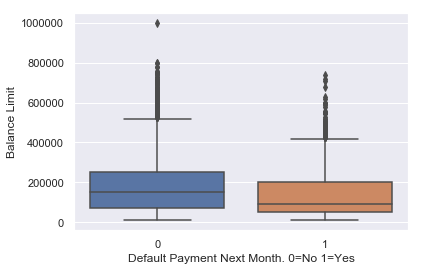

In [17]:
_ = sns.boxplot(x='default_payment_next_month', y='LIMIT_BAL', data=df)
_ = plt.xlabel('Default Payment Next Month. 0=No 1=Yes')
_ = plt.ylabel('Balance Limit')
#Non-default=0 Default=1

Takeaway: The above graph shows good loans (0) vs. defaulted loans(#1) by loan limit. The average loan we see that is being defaulted are loans with lower balance limits. This runs counterintuitive to what we would expect. What about these lower balance loans are causing these defaults. 

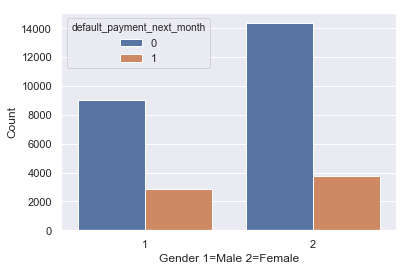

In [18]:
_ = sns.countplot(x='SEX', data=df,hue="default_payment_next_month")
_ = plt.xlabel('Gender 1=Male 2=Female')
_ = plt.ylabel('Count')
#Female = 1 Male = 2

Takeaway: More females (#2) are receiving loans than males. However, men seem to be defaulting at a higher rate. 

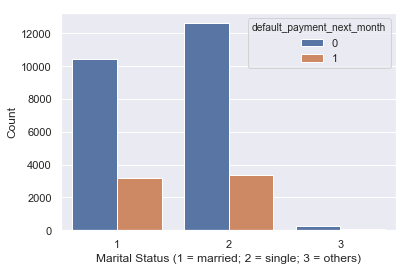

In [19]:
_= sns.countplot(x='MARRIAGE', data=df,hue="default_payment_next_month")
_= plt.xlabel('Marital Status (1 = married; 2 = single; 3 = others)')
_= plt.ylabel('Count')
# Marital status (1 = married; 2 = single; 3 = others)

Takeaway: Married couples #1 are defaulting at a slightly higher rate than singles

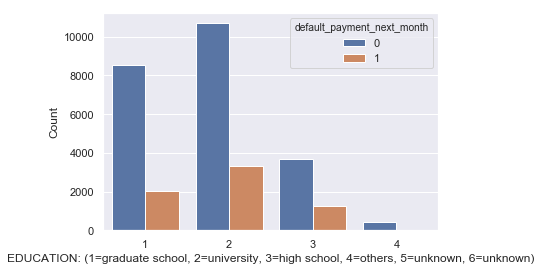

In [20]:
_= sns.countplot(x='EDUCATION', data=df,hue="default_payment_next_month")
_= plt.xlabel('EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)')
_= plt.ylabel('Count')
#Pretty even rates of default based on education

Takeaway: At first glance, the rate of defaults seem pretty evenly spread out amoung various levels of education. 

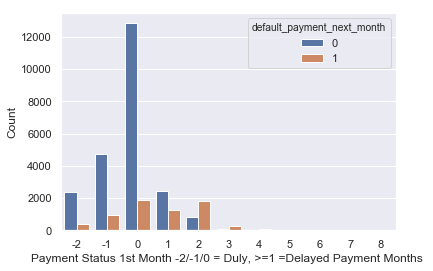

In [21]:
_= sns.countplot(x='PAY_1', data=df,hue="default_payment_next_month")
_= plt.xlabel('Payment Status 1st Month -2/-1/0 = Duly, >=1 =Delayed Payment Months ')
_= plt.ylabel('Count')
#More delay = more likely to default

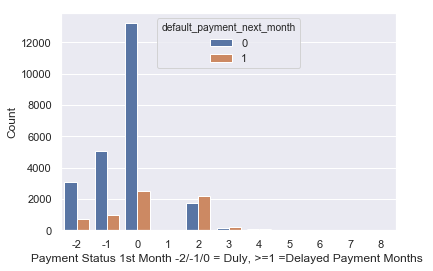

In [22]:
_= sns.countplot(x='PAY_2', data=df,hue="default_payment_next_month")
_= plt.xlabel('Payment Status 1st Month -2/-1/0 = Duly, >=1 =Delayed Payment Months ')
_= plt.ylabel('Count')
#More delay = more likely to default

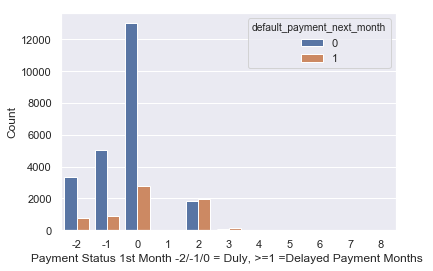

In [23]:
_= sns.countplot(x='PAY_3', data=df,hue="default_payment_next_month")
_= plt.xlabel('Payment Status 1st Month -2/-1/0 = Duly, >=1 =Delayed Payment Months ')
_= plt.ylabel('Count')
# More delay = more likely to default

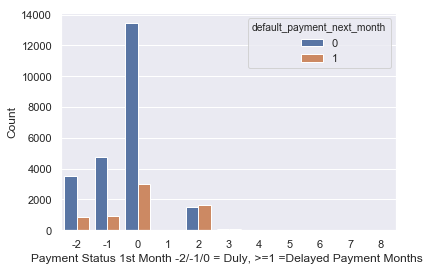

In [24]:
_= sns.countplot(x='PAY_4', data=df,hue="default_payment_next_month")
_= plt.xlabel('Payment Status 1st Month -2/-1/0 = Duly, >=1 =Delayed Payment Months ')
_= plt.ylabel('Count')
# More delay = more likely to default

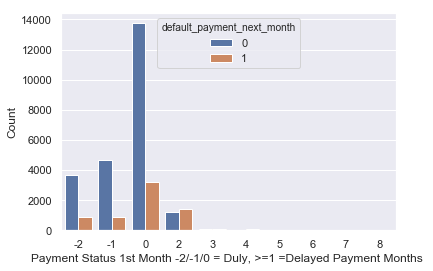

In [25]:
_= sns.countplot(x='PAY_5', data=df,hue="default_payment_next_month")
_= plt.xlabel('Payment Status 1st Month -2/-1/0 = Duly, >=1 =Delayed Payment Months ')
_= plt.ylabel('Count')
#More delay = more likely to default

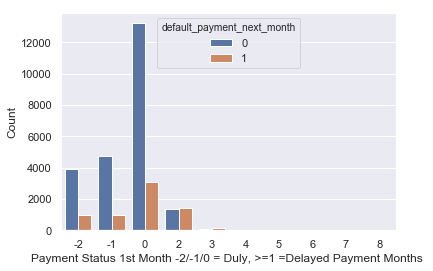

In [26]:
_= sns.countplot(x='PAY_6', data=df,hue="default_payment_next_month")
_= plt.xlabel('Payment Status 1st Month -2/-1/0 = Duly, >=1 =Delayed Payment Months ')
_= plt.ylabel('Count')
#More delay = more likely to default

Takeaway: Unsurprisingly, delayed payments lead to higher default rates. 

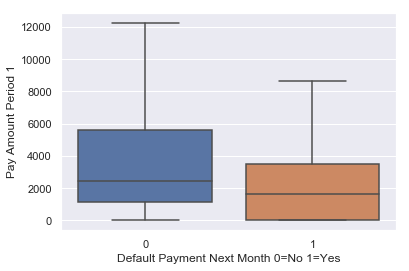

In [27]:
_= sns.boxplot(x='default_payment_next_month', y='PAY_AMT1', data=df, showfliers=False)
_= plt.xlabel('Default Payment Next Month 0=No 1=Yes')
_= plt.ylabel('Pay Amount Period 1')


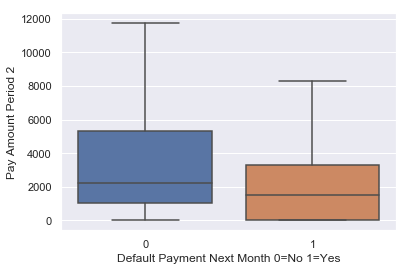

In [28]:
_= sns.boxplot(x='default_payment_next_month', y='PAY_AMT2', data=df, showfliers=False)
_= plt.xlabel('Default Payment Next Month 0=No 1=Yes')
_= plt.ylabel('Pay Amount Period 2')


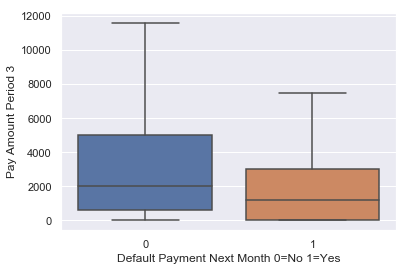

In [29]:
_= sns.boxplot(x='default_payment_next_month', y='PAY_AMT3', data=df, showfliers=False)
_= plt.xlabel('Default Payment Next Month 0=No 1=Yes')
_= plt.ylabel('Pay Amount Period 3')


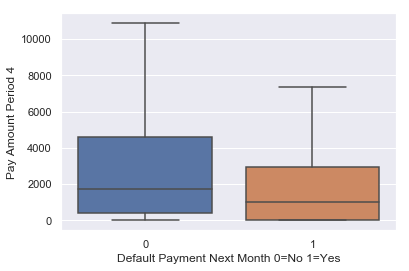

In [30]:
_= sns.boxplot(x='default_payment_next_month', y='PAY_AMT4', data=df, showfliers=False)
_= plt.xlabel('Default Payment Next Month 0=No 1=Yes')
_= plt.ylabel('Pay Amount Period 4')


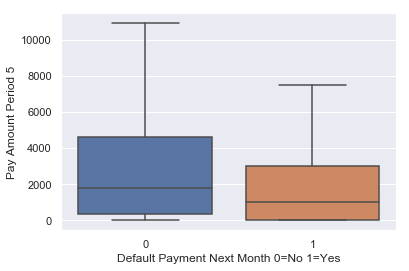

In [31]:
_= sns.boxplot(x='default_payment_next_month', y='PAY_AMT5', data=df, showfliers=False)
_= plt.xlabel('Default Payment Next Month 0=No 1=Yes')
_= plt.ylabel('Pay Amount Period 5')


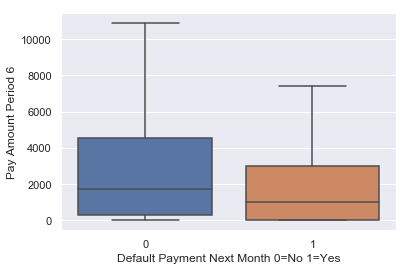

In [32]:
_= sns.boxplot(x='default_payment_next_month', y='PAY_AMT6', data=df, showfliers=False)
_= plt.xlabel('Default Payment Next Month 0=No 1=Yes')
_= plt.ylabel('Pay Amount Period 6')


Takeaway: Smaller payments tend to default more. This makes sense for two reasons. 1. We already saw that lower balance loans tend to default at higher rates. 2. Less Payments should equal higher rate of defaults. 

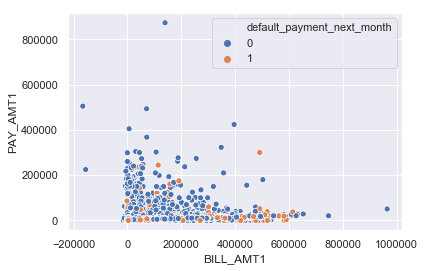

In [33]:
sns.scatterplot(x='BILL_AMT1', y='PAY_AMT1', data=df, hue='default_payment_next_month')

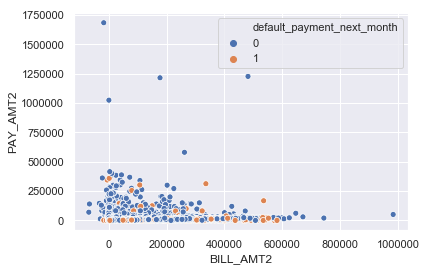

In [34]:
sns.scatterplot(x='BILL_AMT2', y='PAY_AMT2', data=df, hue='default_payment_next_month')

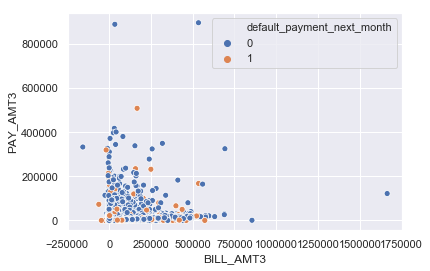

In [35]:
sns.scatterplot(x='BILL_AMT3', y='PAY_AMT3', data=df, hue='default_payment_next_month')

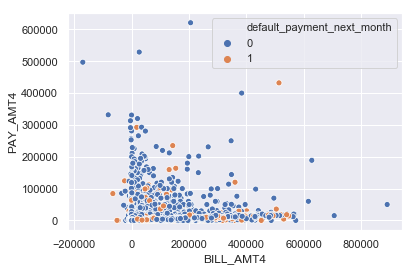

In [36]:
sns.scatterplot(x='BILL_AMT4', y='PAY_AMT4', data=df, hue='default_payment_next_month')

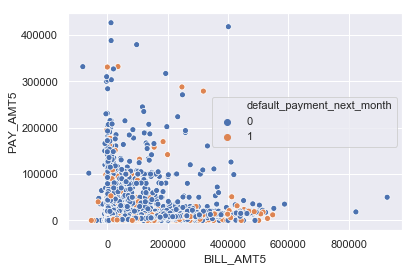

In [37]:
sns.scatterplot(x='BILL_AMT5', y='PAY_AMT5', data=df, hue='default_payment_next_month')

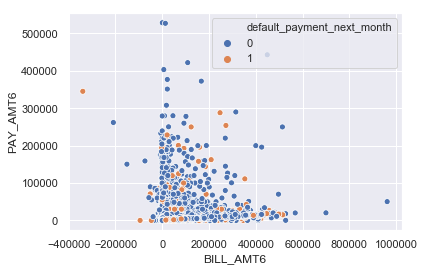

In [38]:
sns.scatterplot(x='BILL_AMT6', y='PAY_AMT6', data=df, hue='default_payment_next_month')

Takeaway: As the time-periods rise, so does the amount of defaults when a large payment is made. Can we pinpoint overextended loans earlier to allow for modifications?

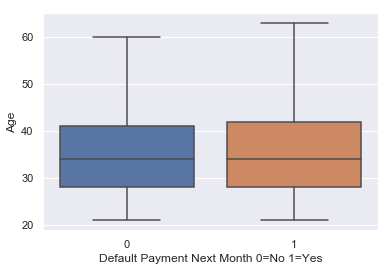

In [39]:
_= sns.boxplot(x='default_payment_next_month', y='AGE', data=df, showfliers=False)
_= plt.xlabel('Default Payment Next Month 0=No 1=Yes')
_= plt.ylabel('Age')

Takeaway: Age is a not a significnt factor in default rate. 

Main EDA Takeaways: A closer inspection of lower balance loans needs to be done. Are we handing out too many lower end loand to people who can not handle them?

Statistical Analysis on Default Loans

In [40]:
#Create Two Data Sets (Default and Non Default)
df_default = df[df.default_payment_next_month == 1]
df_nondefault = df[df.default_payment_next_month == 0]

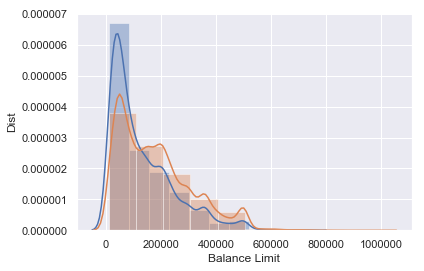

In [41]:
_=sns.distplot(df_default['LIMIT_BAL'],kde=True,bins=10)
_=sns.distplot(df_nondefault['LIMIT_BAL'],kde=True,bins=10)
_=plt.xlabel('Balance Limit')
_=plt.ylabel('Dist')


In [42]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

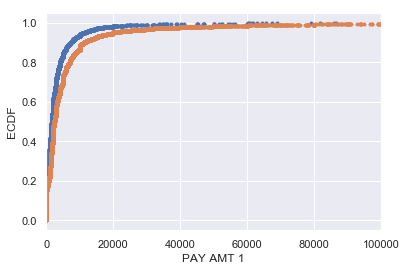

In [43]:
x_payamt1_default, y_payamt1_default = ecdf(df_default['PAY_AMT1'])
x_payamt1_nondefault, y_payamt1_nondefault = ecdf(df_nondefault['PAY_AMT1'])
_ = plt.plot(x_payamt1_default, y_payamt1_default, marker = '.', linestyle = 'none')
_ = plt.plot(x_payamt1_nondefault, y_payamt1_nondefault, marker = '.', linestyle = 'none')
_ = plt.xlabel('PAY AMT 1')
_ = plt.xlim(right=100000, left=0)
_ = plt.ylabel('ECDF')
plt.show()

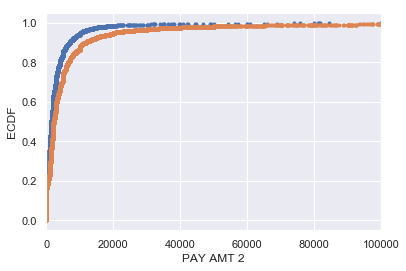

In [44]:
x_payamt2_default, y_payamt2_default = ecdf(df_default['PAY_AMT2'])
x_payamt2_nondefault, y_payamt2_nondefault = ecdf(df_nondefault['PAY_AMT2'])
_ = plt.plot(x_payamt2_default, y_payamt2_default, marker = '.', linestyle = 'none')
_ = plt.plot(x_payamt2_nondefault, y_payamt2_nondefault, marker = '.', linestyle = 'none')
_ = plt.xlabel('PAY AMT 2')
_ = plt.xlim(right=100000, left=0)
_ = plt.ylabel('ECDF')
plt.show()

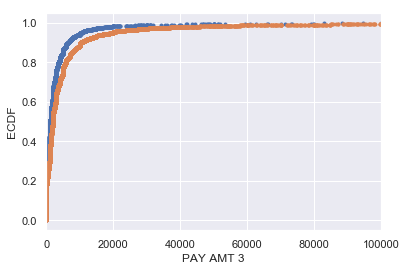

In [45]:
x_payamt3_default, y_payamt3_default = ecdf(df_default['PAY_AMT3'])
x_payamt3_nondefault, y_payamt3_nondefault = ecdf(df_nondefault['PAY_AMT3'])
_ = plt.plot(x_payamt3_default, y_payamt3_default, marker = '.', linestyle = 'none')
_ = plt.plot(x_payamt3_nondefault, y_payamt3_nondefault, marker = '.', linestyle = 'none')
_ = plt.xlabel('PAY AMT 3')
_ = plt.xlim(right=100000, left=0)
_ = plt.ylabel('ECDF')
plt.show()

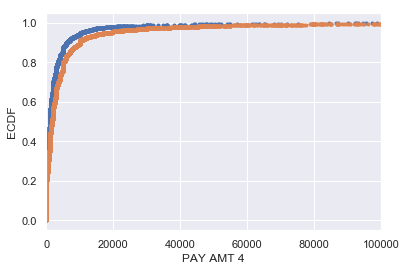

In [46]:
x_payamt4_default, y_payamt4_default = ecdf(df_default['PAY_AMT4'])
x_payamt4_nondefault, y_payamt4_nondefault = ecdf(df_nondefault['PAY_AMT4'])
_ = plt.plot(x_payamt4_default, y_payamt4_default, marker = '.', linestyle = 'none')
_ = plt.plot(x_payamt4_nondefault, y_payamt4_nondefault, marker = '.', linestyle = 'none')
_ = plt.xlabel('PAY AMT 4')
_ = plt.xlim(right=100000, left=0)
_ = plt.ylabel('ECDF')
plt.show()

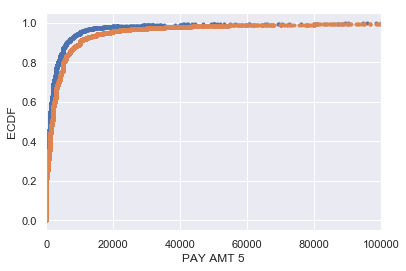

In [47]:
x_payamt5_default, y_payamt5_default = ecdf(df_default['PAY_AMT5'])
x_payamt5_nondefault, y_payamt5_nondefault = ecdf(df_nondefault['PAY_AMT5'])
_ = plt.plot(x_payamt5_default, y_payamt5_default, marker = '.', linestyle = 'none')
_ = plt.plot(x_payamt5_nondefault, y_payamt5_nondefault, marker = '.', linestyle = 'none')
_ = plt.xlabel('PAY AMT 5')
_ = plt.xlim(right=100000, left=0)
_ = plt.ylabel('ECDF')
plt.show()

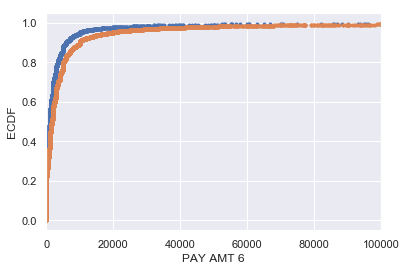

In [48]:
x_payamt6_default, y_payamt6_default = ecdf(df_default['PAY_AMT6'])
x_payamt6_nondefault, y_payamt6_nondefault = ecdf(df_nondefault['PAY_AMT6'])
_ = plt.plot(x_payamt6_default, y_payamt6_default, marker = '.', linestyle = 'none')
_ = plt.plot(x_payamt6_nondefault, y_payamt6_nondefault, marker = '.', linestyle = 'none')
_ = plt.xlabel('PAY AMT 6')
_ = plt.xlim(right=100000, left=0)
_ = plt.ylabel('ECDF')
plt.show()

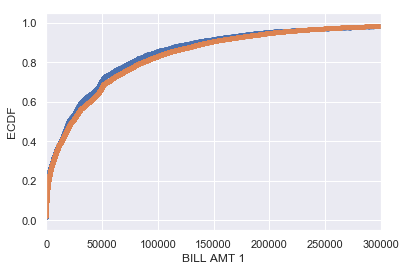

In [49]:
x_billamt1_default, y_billamt1_default = ecdf(df_default['BILL_AMT1'])
x_billamt1_nondefault, y_billamt1_nondefault = ecdf(df_nondefault['BILL_AMT1'])
_ = plt.plot(x_billamt1_default, y_billamt1_default, marker = '.', linestyle = 'none')
_ = plt.plot(x_billamt1_nondefault, y_billamt1_nondefault, marker = '.', linestyle = 'none')
_ = plt.xlabel('BILL AMT 1')
_ = plt.xlim(left=0, right=300000)
_ = plt.ylabel('ECDF')
plt.show()

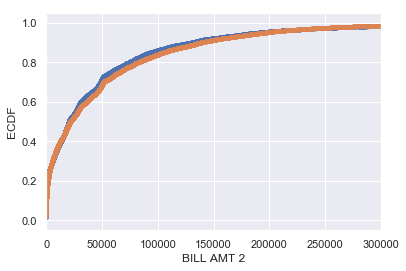

In [50]:
x_billamt2_default, y_billamt2_default = ecdf(df_default['BILL_AMT2'])
x_billamt2_nondefault, y_billamt2_nondefault = ecdf(df_nondefault['BILL_AMT2'])
_ = plt.plot(x_billamt2_default, y_billamt2_default, marker = '.', linestyle = 'none')
_ = plt.plot(x_billamt2_nondefault, y_billamt2_nondefault, marker = '.', linestyle = 'none')
_ = plt.xlabel('BILL AMT 2')
_ = plt.xlim(left=0, right=300000)
_ = plt.ylabel('ECDF')
plt.show()

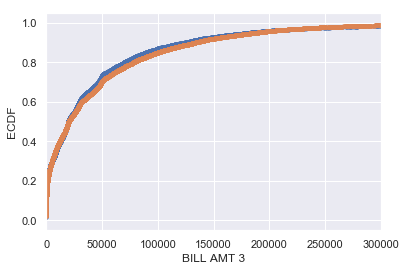

In [51]:
x_billamt3_default, y_billamt3_default = ecdf(df_default['BILL_AMT3'])
x_billamt3_nondefault, y_billamt3_nondefault = ecdf(df_nondefault['BILL_AMT3'])
_ = plt.plot(x_billamt3_default, y_billamt3_default, marker = '.', linestyle = 'none')
_ = plt.plot(x_billamt3_nondefault, y_billamt3_nondefault, marker = '.', linestyle = 'none')
_ = plt.xlabel('BILL AMT 3')
_ = plt.xlim(left=0, right=300000)
_ = plt.ylabel('ECDF')
plt.show()

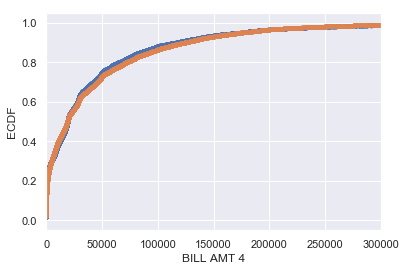

In [52]:
x_billamt4_default, y_billamt4_default = ecdf(df_default['BILL_AMT4'])
x_billamt4_nondefault, y_billamt4_nondefault = ecdf(df_nondefault['BILL_AMT4'])
_ = plt.plot(x_billamt4_default, y_billamt4_default, marker = '.', linestyle = 'none')
_ = plt.plot(x_billamt4_nondefault, y_billamt4_nondefault, marker = '.', linestyle = 'none')
_ = plt.xlabel('BILL AMT 4')
_ = plt.xlim(left=0, right=300000)
_ = plt.ylabel('ECDF')
plt.show()

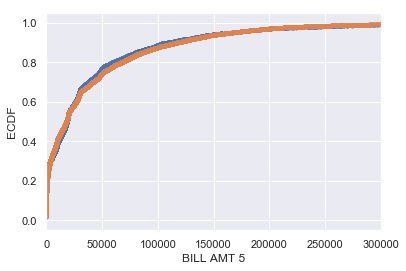

In [53]:
x_billamt5_default, y_billamt5_default = ecdf(df_default['BILL_AMT5'])
x_billamt5_nondefault, y_billamt5_nondefault = ecdf(df_nondefault['BILL_AMT5'])
_ = plt.plot(x_billamt5_default, y_billamt5_default, marker = '.', linestyle = 'none')
_ = plt.plot(x_billamt5_nondefault, y_billamt5_nondefault, marker = '.', linestyle = 'none')
_ = plt.xlabel('BILL AMT 5')
_ = plt.xlim(left=0, right=300000)
_ = plt.ylabel('ECDF')
plt.show()

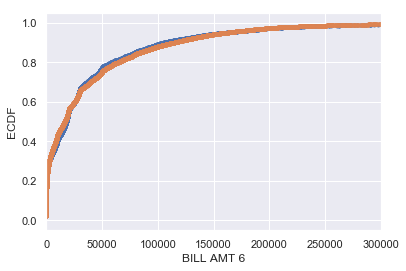

In [54]:
x_billamt6_default, y_billamt6_default = ecdf(df_default['BILL_AMT6'])
x_billamt6_nondefault, y_billamt6_nondefault = ecdf(df_nondefault['BILL_AMT6'])
_ = plt.plot(x_billamt6_default, y_billamt6_default, marker = '.', linestyle = 'none')
_ = plt.plot(x_billamt6_nondefault, y_billamt6_nondefault, marker = '.', linestyle = 'none')
_ = plt.xlabel('BILL AMT 6')
_ = plt.xlim(left=0, right=300000)
_ = plt.ylabel('ECDF')
plt.show()

ECDF Curves Similar for Bill and Pay Amt on Default vs Non Defualt Loans. 

Correlation Matrix

In [55]:
corr = df.corr()

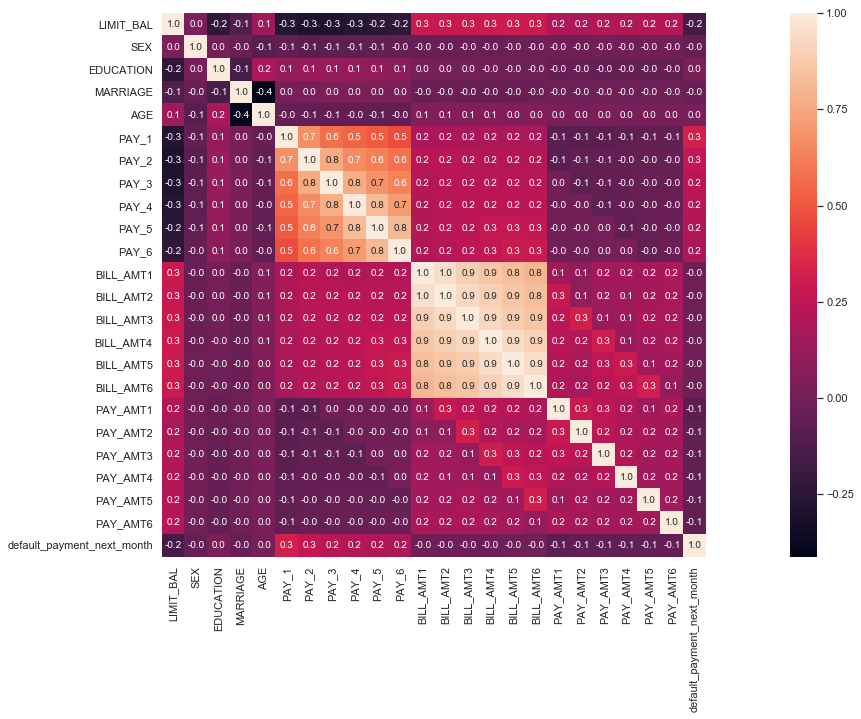

In [56]:
plt.subplots(figsize=(30,10))
sns.heatmap(corr, square=True, annot=True, fmt=".1f")


In [57]:
focus_cols = ['default_payment_next_month']
df.corr().filter(focus_cols).drop(focus_cols).sort_values(by=['default_payment_next_month'], ascending=False)

,default_payment_next_month
PAY_1,0.324794
PAY_2,0.263551
PAY_3,0.235253
PAY_4,0.216614
PAY_5,0.204149
PAY_6,0.186866
EDUCATION,0.033842
AGE,0.013890
BILL_AMT6,-0.005372
BILL_AMT5,-0.006760


Payment Status looks to be the Number 1 predictor of default, starting with the first period. Is this bank giving too much money to people who can't even repay the first payment?

Data Pre-processing: Since we have a mix of categorical and continuous data, we need to perform the following steps. 
1. Split into two dataframes: Categorical and Continuous. 
2. Encode the categorical data. 
3. Normalize the Continuous data. 
4. Combine the new data sets. 

In [58]:
#1. Create Categorical Data
categorical = df.loc[ :, ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5']]
print('Summary of feature sample')
categorical.head()

Summary of feature sample


,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5
ID,,,,,,,,
1,2,2,1,2,2,-1,-1,-2
2,2,2,2,-1,2,0,0,0
3,2,2,2,0,0,0,0,0
4,2,2,1,0,0,0,0,0
5,1,2,1,-1,0,-1,0,0


In [59]:
#1. Create Continuous Data
continuous = df.loc[ :, ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']]
continuous.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
ID,,,,,,,,,,
1,3913,3102,689,0,0,0,689,0,0,0
2,2682,1725,2682,3272,3455,0,1000,1000,1000,0
3,29239,14027,13559,14331,14948,1518,1500,1000,1000,1000
4,46990,48233,49291,28314,28959,2000,2019,1200,1100,1069
5,8617,5670,35835,20940,19146,2000,36681,10000,9000,689


In [60]:
#2. Encode Categorical Data
categorical_onehot = categorical.copy()
categorical_onehot = pd.get_dummies(data=categorical_onehot, columns=['SEX', 'EDUCATION', 'MARRIAGE','PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5'])

print(categorical_onehot.head())

    SEX_1  SEX_2  EDUCATION_1  EDUCATION_2  EDUCATION_3  EDUCATION_4  \
ID                                                                     
1       0      1            0            1            0            0   
2       0      1            0            1            0            0   
3       0      1            0            1            0            0   
4       0      1            0            1            0            0   
5       1      0            0            1            0            0   

    MARRIAGE_1  MARRIAGE_2  MARRIAGE_3  PAY_1_-2  ...  PAY_5_-2  PAY_5_-1  \
ID                                                ...                       
1            1           0           0         0  ...         1         0   
2            0           1           0         0  ...         0         0   
3            0           1           0         0  ...         0         0   
4            1           0           0         0  ...         0         0   
5            1           0       

In [61]:
scaler = MinMaxScaler() 
continuous_scaled = scaler.fit_transform(continuous)
continuous.loc[:,:] = continuous_scaled
print(continuous.head())

    BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  PAY_AMT1  PAY_AMT2  \
ID                                                                              
1    0.149982   0.069164   0.086723   0.160138   0.080648  0.000000  0.000409   
2    0.148892   0.067858   0.087817   0.163220   0.084074  0.000000  0.000594   
3    0.172392   0.079532   0.093789   0.173637   0.095470  0.001738  0.000891   
4    0.188100   0.111995   0.113407   0.186809   0.109363  0.002290  0.001199   
5    0.154144   0.071601   0.106020   0.179863   0.099633  0.002290  0.021779   

    PAY_AMT3  PAY_AMT4  PAY_AMT5  
ID                                
1   0.000000  0.000000  0.000000  
2   0.001116  0.001610  0.000000  
3   0.001116  0.001610  0.002345  
4   0.001339  0.001771  0.002506  
5   0.011160  0.014493  0.001615  


C:\Users\jharp\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [62]:
complete= categorical_onehot.merge(continuous, left_on='ID', right_on='ID')
print(complete.head())

    SEX_1  SEX_2  EDUCATION_1  EDUCATION_2  EDUCATION_3  EDUCATION_4  \
ID                                                                     
1       0      1            0            1            0            0   
2       0      1            0            1            0            0   
3       0      1            0            1            0            0   
4       0      1            0            1            0            0   
5       1      0            0            1            0            0   

    MARRIAGE_1  MARRIAGE_2  MARRIAGE_3  PAY_1_-2  ...  BILL_AMT1  BILL_AMT2  \
ID                                                ...                         
1            1           0           0         0  ...   0.149982   0.069164   
2            0           1           0         0  ...   0.148892   0.067858   
3            0           1           0         0  ...   0.172392   0.079532   
4            1           0           0         0  ...   0.188100   0.111995   
5            1       

In [63]:
complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 73 columns):
SEX_1          30000 non-null uint8
SEX_2          30000 non-null uint8
EDUCATION_1    30000 non-null uint8
EDUCATION_2    30000 non-null uint8
EDUCATION_3    30000 non-null uint8
EDUCATION_4    30000 non-null uint8
MARRIAGE_1     30000 non-null uint8
MARRIAGE_2     30000 non-null uint8
MARRIAGE_3     30000 non-null uint8
PAY_1_-2       30000 non-null uint8
PAY_1_-1       30000 non-null uint8
PAY_1_0        30000 non-null uint8
PAY_1_1        30000 non-null uint8
PAY_1_2        30000 non-null uint8
PAY_1_3        30000 non-null uint8
PAY_1_4        30000 non-null uint8
PAY_1_5        30000 non-null uint8
PAY_1_6        30000 non-null uint8
PAY_1_7        30000 non-null uint8
PAY_1_8        30000 non-null uint8
PAY_2_-2       30000 non-null uint8
PAY_2_-1       30000 non-null uint8
PAY_2_0        30000 non-null uint8
PAY_2_1        30000 non-null uint8
PAY_2_2        30000 non-nu

In [64]:
#Drop Categorical Data columns to avoid linear dependency. 
complete = complete.drop(columns=['SEX_1', 'EDUCATION_1', 'MARRIAGE_1', 'PAY_1_0', 'PAY_2_0','PAY_3_0', 'PAY_4_0' , 'PAY_5_0'])

In [65]:
complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 65 columns):
SEX_2          30000 non-null uint8
EDUCATION_2    30000 non-null uint8
EDUCATION_3    30000 non-null uint8
EDUCATION_4    30000 non-null uint8
MARRIAGE_2     30000 non-null uint8
MARRIAGE_3     30000 non-null uint8
PAY_1_-2       30000 non-null uint8
PAY_1_-1       30000 non-null uint8
PAY_1_1        30000 non-null uint8
PAY_1_2        30000 non-null uint8
PAY_1_3        30000 non-null uint8
PAY_1_4        30000 non-null uint8
PAY_1_5        30000 non-null uint8
PAY_1_6        30000 non-null uint8
PAY_1_7        30000 non-null uint8
PAY_1_8        30000 non-null uint8
PAY_2_-2       30000 non-null uint8
PAY_2_-1       30000 non-null uint8
PAY_2_1        30000 non-null uint8
PAY_2_2        30000 non-null uint8
PAY_2_3        30000 non-null uint8
PAY_2_4        30000 non-null uint8
PAY_2_5        30000 non-null uint8
PAY_2_6        30000 non-null uint8
PAY_2_7        30000 non-nu

In [66]:
#add back in dependent variable
complete= complete.merge(df['default_payment_next_month'], left_on='ID', right_on='ID')
print(complete.head())

    SEX_2  EDUCATION_2  EDUCATION_3  EDUCATION_4  MARRIAGE_2  MARRIAGE_3  \
ID                                                                         
1       1            1            0            0           0           0   
2       1            1            0            0           1           0   
3       1            1            0            0           1           0   
4       1            1            0            0           0           0   
5       0            1            0            0           0           0   

    PAY_1_-2  PAY_1_-1  PAY_1_1  PAY_1_2  ...  BILL_AMT2  BILL_AMT3  \
ID                                        ...                         
1          0         0        0        1  ...   0.069164   0.086723   
2          0         1        0        0  ...   0.067858   0.087817   
3          0         0        0        0  ...   0.079532   0.093789   
4          0         0        0        0  ...   0.111995   0.113407   
5          0         1        0        0 

Set y (dependent) and x (independent variables)

In [67]:
#Classify dependent and independent
X = complete.iloc[:,0:64]
Y = complete.iloc[:,65]

Set Training and Test Data Sets

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=21, stratify=Y)

K Nearest Neighbors

In [69]:
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=14)
#train model with cv of 5 
knn_cv.fit(X_train, y_train)
y_pred_knn = knn_cv.predict(X_test)

In [70]:
cm = confusion_matrix(y_test, y_pred_knn)
cm

array([[5585,  256],
       [1118,  541]], dtype=int64)

In [71]:
roc=roc_auc_score(y_test, y_pred_knn)
acc = accuracy_score(y_test, y_pred_knn)
prec = precision_score(y_test, y_pred_knn)
rec = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

model_results = pd.DataFrame([['KNN', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,KNN,0.8168,0.678795,0.3261,0.440554,0.641136


Logistic Regression

In [72]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

C:\Users\jharp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [73]:
cm = confusion_matrix(y_test, y_pred_logreg)
cm

array([[5586,  255],
       [1037,  622]], dtype=int64)

In [74]:
roc=roc_auc_score(y_test, y_pred_logreg)
acc = accuracy_score(y_test, y_pred_logreg)
prec = precision_score(y_test, y_pred_logreg)
rec = recall_score(y_test, y_pred_logreg)
f1 = f1_score(y_test, y_pred_logreg)
model =  pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,KNN,0.816800,0.678795,0.326100,0.440554,0.641136
1,Logistic Regression,0.827733,0.709236,0.374925,0.490536,0.665634


Random Forest

In [75]:
# Create the model with 100 trees
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [76]:
cm = confusion_matrix(y_test, y_pred_rf)
cm

array([[5521,  320],
       [1042,  617]], dtype=int64)

In [77]:
roc=roc_auc_score(y_test, y_pred_rf)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
model =  pd.DataFrame([['Random Forest', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,KNN,0.816800,0.678795,0.326100,0.440554,0.641136
1,Logistic Regression,0.827733,0.709236,0.374925,0.490536,0.665634
2,Random Forest,0.818400,0.658485,0.371911,0.475347,0.658563


Gradient Boosting

In [78]:
gb = GradientBoostingClassifier(learning_rate=0.05, max_depth=4, random_state=2018)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [79]:
cm = confusion_matrix(y_test, y_pred_gb)
cm

array([[5598,  243],
       [1069,  590]], dtype=int64)

In [80]:
roc=roc_auc_score(y_test, y_pred_rf)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
model =  pd.DataFrame([['Gradient Boosting', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,KNN,0.816800,0.678795,0.326100,0.440554,0.641136
1,Logistic Regression,0.827733,0.709236,0.374925,0.490536,0.665634
2,Random Forest,0.818400,0.658485,0.371911,0.475347,0.658563
3,Gradient Boosting,0.818400,0.658485,0.371911,0.475347,0.658563


Logistic Regression gives us the best model scores all around. We can predict with 82.77% accuracy if a loan will default. 

In [86]:
logreg.coef_.T

array([[-0.13180289],
       [ 0.10682593],
       [ 0.09887106],
       [-1.03489151],
       [-0.1632333 ],
       [ 0.05743333],
       [-0.01926962],
       [ 0.6072464 ],
       [ 0.9473916 ],
       [ 2.23023103],
       [ 2.00034741],
       [ 1.55729947],
       [ 1.01319164],
       [ 0.01623065],
       [ 1.15455375],
       [ 0.49880235],
       [ 0.11481586],
       [-0.19647701],
       [-0.49894286],
       [ 0.16184264],
       [ 0.31212458],
       [-0.05020499],
       [ 0.42486252],
       [ 0.89323041],
       [ 0.75372832],
       [ 0.        ],
       [-0.09298201],
       [-0.15307909],
       [-0.00726674],
       [ 0.34485274],
       [ 0.41892182],
       [-0.17386619],
       [-0.23635272],
       [ 1.17233762],
       [ 0.58062942],
       [-0.14766924],
       [ 0.02691873],
       [-0.06778262],
       [ 0.41602419],
       [ 0.22486188],
       [ 0.14184888],
       [ 0.54102715],
       [-0.2867018 ],
       [ 0.14162145],
       [ 0.37833581],
       [-0

In [96]:
np.array([complete.columns[1:-1]]).T

array([['EDUCATION_2'],
       ['EDUCATION_3'],
       ['EDUCATION_4'],
       ['MARRIAGE_2'],
       ['MARRIAGE_3'],
       ['PAY_1_-2'],
       ['PAY_1_-1'],
       ['PAY_1_1'],
       ['PAY_1_2'],
       ['PAY_1_3'],
       ['PAY_1_4'],
       ['PAY_1_5'],
       ['PAY_1_6'],
       ['PAY_1_7'],
       ['PAY_1_8'],
       ['PAY_2_-2'],
       ['PAY_2_-1'],
       ['PAY_2_1'],
       ['PAY_2_2'],
       ['PAY_2_3'],
       ['PAY_2_4'],
       ['PAY_2_5'],
       ['PAY_2_6'],
       ['PAY_2_7'],
       ['PAY_2_8'],
       ['PAY_3_-2'],
       ['PAY_3_-1'],
       ['PAY_3_1'],
       ['PAY_3_2'],
       ['PAY_3_3'],
       ['PAY_3_4'],
       ['PAY_3_5'],
       ['PAY_3_6'],
       ['PAY_3_7'],
       ['PAY_3_8'],
       ['PAY_4_-2'],
       ['PAY_4_-1'],
       ['PAY_4_1'],
       ['PAY_4_2'],
       ['PAY_4_3'],
       ['PAY_4_4'],
       ['PAY_4_5'],
       ['PAY_4_6'],
       ['PAY_4_7'],
       ['PAY_4_8'],
       ['PAY_5_-2'],
       ['PAY_5_-1'],
       ['PAY_5_2'],
       ['PAY

In [97]:
feature_importance=pd.DataFrame(np.hstack((np.array([complete.columns[1:-1]]).T, logreg.coef_.T)), columns=['feature', 'importance'])

In [98]:
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])

In [99]:
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
9,PAY_1_3,2.230231
10,PAY_1_4,2.000347
11,PAY_1_5,1.557299
33,PAY_3_7,1.172338
14,PAY_1_8,1.154554
12,PAY_1_6,1.013192
8,PAY_1_2,0.947392
23,PAY_2_7,0.893230
24,PAY_2_8,0.753728
7,PAY_1_1,0.607246


Payment Status and amount are the leading predictors of default. 